<a href="https://colab.research.google.com/github/Noorbaignuroo/CodeSoft-Internship-Projects/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**imported necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Load the Titanic Dataset:**

In [ ]:
vfrom google.colab import drive
drive.mount('/content/drive')
file_path = '/content/tested.csv'
titanic = pd.read_csv(file_path)
titanic.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Explore the Data:**

<Axes: xlabel='Survived', ylabel='count'>

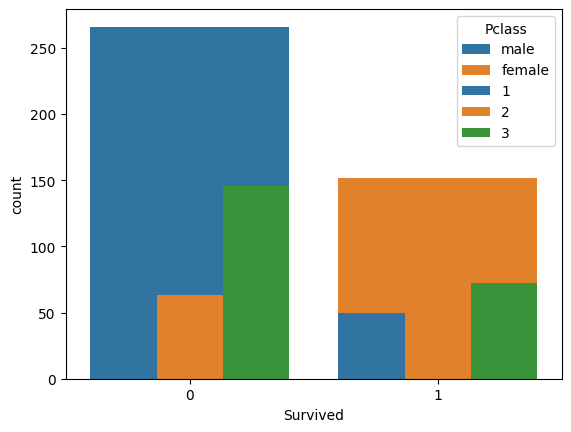

In [ ]:
# Explore the Data
titanic.isnull().sum()

# Visualize the data
sns.countplot(x='Survived', data=titanic)
sns.countplot(x='Survived', hue='Sex', data=titanic)
sns.countplot(x='Survived', hue='Pclass', data=titanic)




**Data Preprocessing:**

In [ ]:
# Print column names
print(titanic.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# Handle missing values for 'Age'
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Convert categorical variables to numerical
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)


**Split the Data:**

In [ ]:
# Features and target variable
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Build and Train the Model:**

In [ ]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='median')

# Fit and transform on training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform on testing data (using the imputer fitted on the training data)
X_test_imputed = imputer.transform(X_test)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_imputed, y_train)





RandomForestClassifier(random_state=42)

**Evaluate the model:**

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}')


Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)


Sex_male       0.806558
Fare           0.060417
Age            0.036431
PassengerId    0.034963
Parch          0.017899
Embarked_Q     0.014119
SibSp          0.012716
Embarked_S     0.005817
Pclass_3       0.005651
Pclass_2       0.005429
dtype: float64
